<a href="https://colab.research.google.com/github/manasb26/coursera_tensorflow_exercises/blob/master/NLP/Different_basic_models_for_IMDB_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Single, Multi Layer LSTM and Conv1D

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.2.0-rc3


In [0]:
import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.2.0-rc3


In [0]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteRVUH52/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteRVUH52/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteRVUH52/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [0]:
tokenizer = info.features['text'].encoder

In [0]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 71s 180ms/step - loss: 0.5370 - accuracy: 0.7283 - val_loss: 0.4301 - val_accuracy: 0.8133
Epoch 2/10
391/391 [==============================] - 70s 179ms/step - loss: 0.3888 - accuracy: 0.8379 - val_loss: 0.4187 - val_accuracy: 0.8397
Epoch 3/10
391/391 [==============================] - 71s 181ms/step - loss: 0.3108 - accuracy: 0.8788 - val_loss: 0.3798 - val_accuracy: 0.8412
Epoch 4/10
391/391 [==============================] - 70s 179ms/step - loss: 0.2486 - accuracy: 0.9078 - val_loss: 0.4079 - val_accuracy: 0.8457
Epoch 5/10
391/391 [==============================] - 69s 178ms/step - loss: 0.3227 - accuracy: 0.8653 - val_loss: 0.5581 - val_accuracy: 0.7072
Epoch 6/10
391/391 [==============================] - 70s 180ms/step - loss: 0.3224 - accuracy: 0.8601 - val_loss: 0.4330 - val_accuracy: 0.8392
Epoch 7/10
391/391 [==============================] - 71s 181ms/step - loss: 0.2166 - accuracy: 0.9169 - val_loss: 0.5403 - val_ac

In [0]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

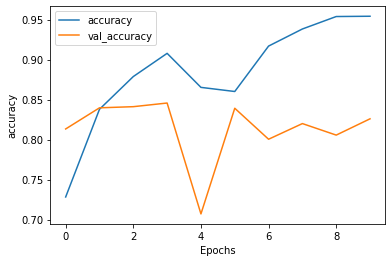

In [0]:
plot_graphs(history, 'accuracy')

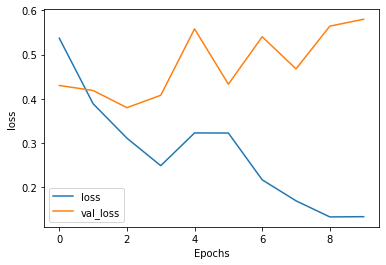

In [0]:
plot_graphs(history, 'loss')

In [0]:
multi_layer_LSTM_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [0]:
multi_layer_LSTM_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
history_multi_layer_LSTM_model = multi_layer_LSTM_model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 139s 355ms/step - loss: 0.5775 - accuracy: 0.6968 - val_loss: 0.4826 - val_accuracy: 0.7782
Epoch 2/10
391/391 [==============================] - 139s 356ms/step - loss: 0.5115 - accuracy: 0.7542 - val_loss: 0.5275 - val_accuracy: 0.7418
Epoch 3/10
391/391 [==============================] - 139s 354ms/step - loss: 0.3804 - accuracy: 0.8416 - val_loss: 0.4639 - val_accuracy: 0.8062
Epoch 4/10
391/391 [==============================] - 137s 351ms/step - loss: 0.3331 - accuracy: 0.8673 - val_loss: 0.5131 - val_accuracy: 0.7898
Epoch 5/10
391/391 [==============================] - 138s 352ms/step - loss: 0.2579 - accuracy: 0.9038 - val_loss: 0.4267 - val_accuracy: 0.8087
Epoch 6/10
391/391 [==============================] - 141s 361ms/step - loss: 0.1818 - accuracy: 0.9367 - val_loss: 0.3624 - val_accuracy: 0.8513
Epoch 7/10
391/391 [==============================] - 141s 360ms/step - loss: 0.1291 - accuracy: 0.9576 - val_loss: 0.4209 -

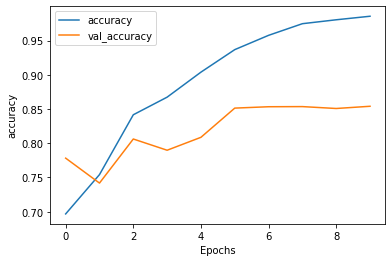

In [0]:
plot_graphs(history_multi_layer_LSTM_model, 'accuracy')

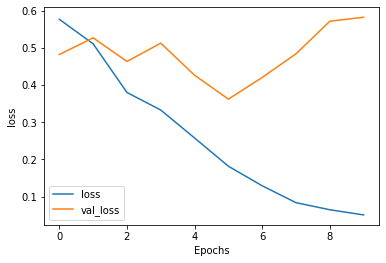

In [0]:
plot_graphs(history_multi_layer_LSTM_model, 'loss')

In [0]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [0]:
conv_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
history_conv_model = conv_model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 33s 84ms/step - loss: 0.4445 - accuracy: 0.7826 - val_loss: 0.3052 - val_accuracy: 0.8778
Epoch 2/10
391/391 [==============================] - 21s 54ms/step - loss: 0.2209 - accuracy: 0.9163 - val_loss: 0.2971 - val_accuracy: 0.8792
Epoch 3/10
391/391 [==============================] - 19s 49ms/step - loss: 0.1701 - accuracy: 0.9384 - val_loss: 0.3380 - val_accuracy: 0.8723
Epoch 4/10
391/391 [==============================] - 19s 48ms/step - loss: 0.1407 - accuracy: 0.9502 - val_loss: 0.3586 - val_accuracy: 0.8713
Epoch 5/10
391/391 [==============================] - 18s 47ms/step - loss: 0.1099 - accuracy: 0.9626 - val_loss: 0.4148 - val_accuracy: 0.8660
Epoch 6/10
391/391 [==============================] - 18s 46ms/step - loss: 0.0855 - accuracy: 0.9724 - val_loss: 0.4844 - val_accuracy: 0.8610
Epoch 7/10
391/391 [==============================] - 18s 46ms/step - loss: 0.0735 - accuracy: 0.9768 - val_loss: 0.5686 - val_accuracy:

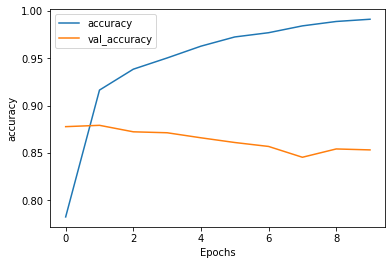

In [0]:
plot_graphs(history_conv_model, 'accuracy')

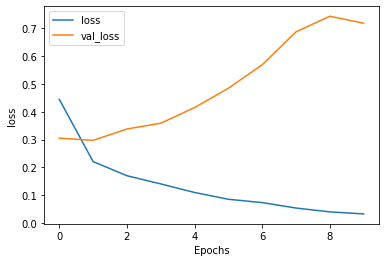

In [0]:
plot_graphs(history_conv_model, 'loss')

Conv1D performs better than the LSTM single or multi layers in basic model with lesser execution time.